In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#reading in the data of the monte carlo integrations with explicit flavour summing
path = 'data1.1aPart1.txt'

data_explicit_sum = []

with open(path, 'r') as f:
    header = f.readline() 
    
    for line in f:
        
        columns = line.split()
        data_line = []
        for value in columns:
            data_line.append(float(value))
            
        data_explicit_sum.append(data_line)

42213.14450780516 81.51400120447818


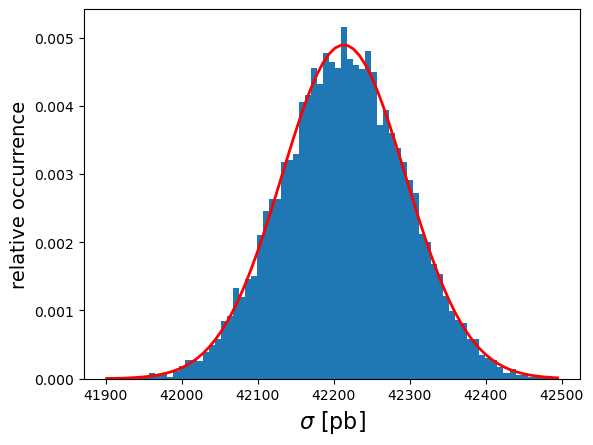

In [4]:
data_explicit_sum = np.array(data_explicit_sum)

(mu, sigma) = norm.fit(data_explicit_sum[:,0])

fig = plt.figure()

count, bins, ignored = plt.hist(data_explicit_sum[:,0],bins = 75, density= True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

plt.ylabel(r'relative occurrence',fontsize= 14)

plt.xlabel(r'$\sigma$ [pb]',fontsize=16)

plt.savefig('1aCrossSectionFlavourSum.png', dpi =400)
print(mu,sigma)

81.77739209845679 0.43462454868801886


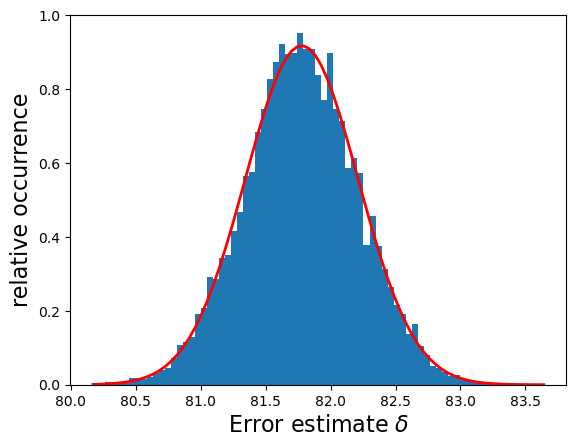

In [12]:

(mu, sigma) = norm.fit(data_explicit_sum[:,1])

fig = plt.figure()

count, bins, ignored = plt.hist(data_explicit_sum[:,1],bins = 75, density= True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.ylabel(r'relative occurrence',fontsize= 16)
plt.xlabel(r'Error estimate $\delta$',fontsize=16)
#plt.savefig('MCIntegrationHist.png', dpi =400)
print(mu,sigma)

In [5]:
#reading in the data of the monte carlo integrations with the random flavours
path = 'data1.1aPart2.txt'

data_random_flav = []

with open(path, 'r') as f:
    header = f.readline() 
    
    for line in f:
        
        columns = line.split()
        data_line = []
        for value in columns:
            data_line.append(float(value))
            
        data_random_flav.append(data_line)
        

42212.73159283777 89.22131175452908


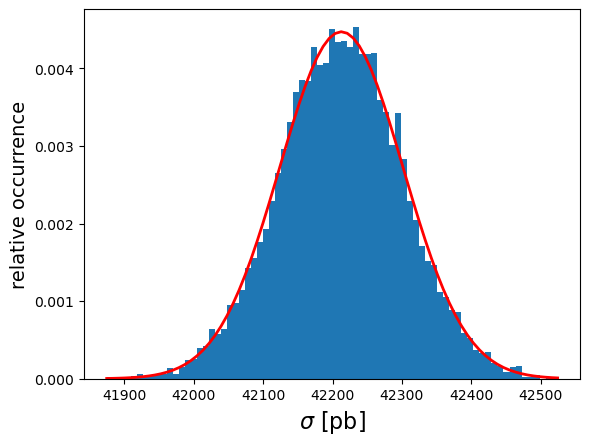

In [6]:
data_random_flav = np.array(data_random_flav)



(mu, sigma) = norm.fit(data_random_flav[:,0])

fig = plt.figure()

count, bins, ignored = plt.hist(data_random_flav[:,0],bins = 75, density= True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

plt.ylabel(r'relative occurrence',fontsize= 14)

plt.xlabel(r'$\sigma$ [pb]',fontsize=16)

plt.savefig('1aCrossSectionFlavourAverage.png', dpi =400)
print(mu,sigma)

90.12022933709919 0.534854321680024


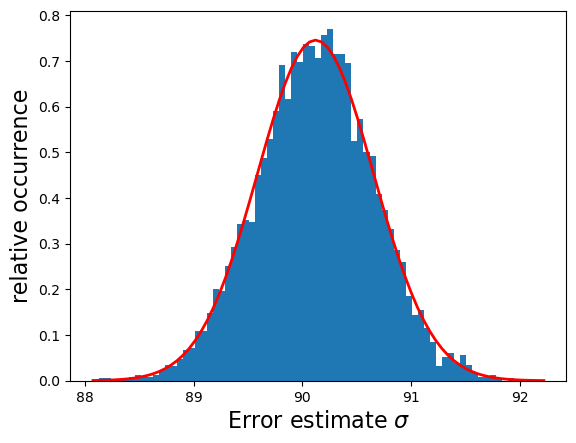

In [22]:
(mu, sigma) = norm.fit(data_random_flav[:,1])

fig = plt.figure()

count, bins, ignored = plt.hist(data_random_flav[:,1],bins = 75, density= True)


plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.ylabel(r'relative occurrence',fontsize= 16)
plt.xlabel(r'Error estimate $\sigma$',fontsize=16)
#plt.savefig('MCIntegrationHist.png', dpi =400)
print(mu,sigma)

In [7]:
#reading in the data to compare the monte carlo error for different number of samples

path = 'data1.1aPart3.txt'

data_error_compare = []

with open(path, 'r') as f:
    header = f.readline() 
    
    for line in f:
        
        columns = line.split()
        data_line = []
        for value in columns:
            data_line.append(float(value))
            
        data_error_compare.append(data_line)
        

[-0.51466503  4.1631576 ]


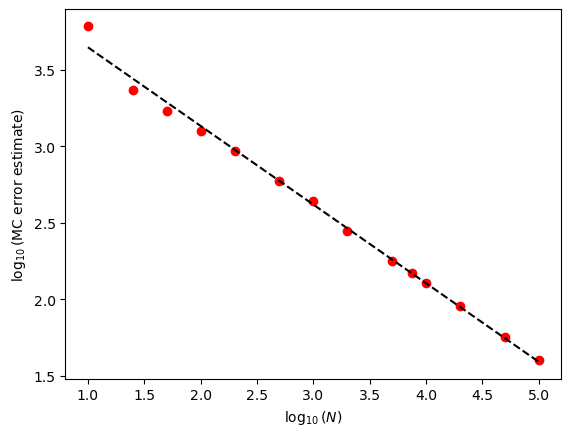

In [9]:
data_error_compare = np.array(data_error_compare)

x = np.log10(data_error_compare[:,0])

y = np.log10(data_error_compare[:,1]) 


coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)




#plt.scatter(np.log10(number_of_samples),np.log10(integration_values_1b[:,1]))

plt.plot(x,y, 'ro', x, poly1d_fn(x), '--k')

plt.ylabel(r'$\log_{10}$(MC error estimate)')
plt.xlabel(r'$\log_{10}(N)$')

print(coef)
plt.savefig('MCerror_N_loglog.png',dpi=400)